# Clan Boss Goods loots analysis

This is a personal project to understand and improve my knowledge/tactics in the game Caravan War.
Copyright (C) 2019  Kasonnara <kasonnara@laposte.net>

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>.

In [4]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas

## Load dataset

In [21]:
data = pandas.read_csv(
    "data/clan_boss_loots.csv", 
    skip_blank_lines = True,
    #parse_dates = ['date'],
    #dayfirst = True,
    )

In [22]:
data

,date,boss_kills,goods_reward
0,13/03/2020,143,205920000
1,15/03/2020,17,3060000
2,15/03/2020,8,720000
3,25/03/2020,1,20000
4,25/03/2020,2,60000
...,...,...,...
271,07/05/2020,61,37820000
272,07/05/2020,63,40320000
273,07/05/2020,65,42900000
274,07/05/2020,67,45560000


In [24]:
#data[data['date'] == datetime.datetime(2020,4,19)]
data[data['date'] == "19/04/2020"]

,date,boss_kills,goods_reward
109,19/04/2020,25,-1116780512
110,19/04/2020,36,-1931728320
111,19/04/2020,47,1951852800
112,19/04/2020,60,1772989888
113,19/04/2020,67,1634371008
114,19/04/2020,79,1629900544
115,19/04/2020,87,272772224
116,19/04/2020,96,1933970944
117,19/04/2020,101,-1881417120
118,19/04/2020,107,-2132943552


In [25]:
# remove the bugged replay (except the last point)
#clean_data = pandas.concat((data[:109], data[130:]))
clean_data = pandas.concat((data[:109], data[130:]))

In [26]:
clean_data

,date,boss_kills,goods_reward
0,13/03/2020,143,205920000
1,15/03/2020,17,3060000
2,15/03/2020,8,720000
3,25/03/2020,1,20000
4,25/03/2020,2,60000
...,...,...,...
271,07/05/2020,61,37820000
272,07/05/2020,63,40320000
273,07/05/2020,65,42900000
274,07/05/2020,67,45560000


In [27]:
clean_data['date'].drop_duplicates()

0      13/03/2020
1      15/03/2020
3      25/03/2020
6      26/03/2020
15     02/04/2020
23     04/04/2020
33     09/04/2020
47     11/04/2020
64     16/04/2020
91     18/04/2020
130    19/04/2020
131    24/04/2020
151    25/04/2020
174    02/05/2020
197    03/05/2020
219    06/05/2020
244    07/05/2020
Name: date, dtype: object

## Ploting

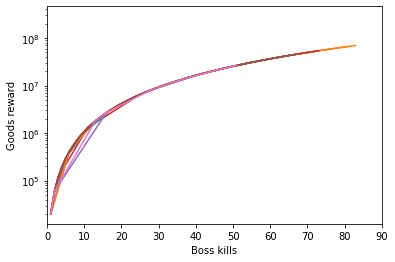

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)
for date, grp in clean_data.groupby('date'):
    ax.plot(grp['boss_kills'], grp['goods_reward'])
ax.set_xlabel("Boss kills")
ax.set_ylabel("Goods reward")
#ax.set_xlim(0, clean_data['boss_kills'].max())
#ax.set_ylim(0, clean_data['goods_reward'].max())
ax.set_xlim(0, 90)
#ax.set_ylim(0, 10**8)
ax.set_yscale('log')

## Resample all values

In [59]:
loot_values = (
    clean_data
    .drop('date', axis=1)
    .drop_duplicates()
    .sort_values(by='boss_kills')
    .set_index('boss_kills')
)

In [60]:
pandas.set_option('display.max_rows', None)
loot_values

,goods_reward
boss_kills,
1,20000
2,60000
3,120000
4,200000
5,300000
6,420000
7,560000
8,720000
9,900000


In [64]:
deltas = loot_values[:58].diff(periods=1)
deltas

,goods_reward
boss_kills,
1,NaN
2,40000.0
3,60000.0
4,80000.0
5,100000.0
6,120000.0
7,140000.0
8,160000.0
9,180000.0


## Conclusion

Each boss level has (20000 x level) goods 

So in total you get ((1+2+3+...+boss_kills)x20000) goods